# 1. Parametric Model

A parametric model can represent a class of instances where each is defined by a value of the parameters. Examples include lines, or circles, or even a parametrized template.

## (1) Fitting a parametric model

- Choose a parametric model to represent a set of features.
- Membership criterion is not local:
    Can't tell whether a point in the image belongs to a given model just by looking at that point.
- Computational complexity is important:
    Not feasible to examine possible parameter setting.
    
## (2) Difficulty of line fitting.

Because edge images is a collection of pixels.

- Extra edge points (clutter), multiple models.
- Only some parts of each line detected, and some parts are missing.
- Noise in measured edge points, orientations.

<img src="images/6/line_fitting.png" width="300px">

## (3) Voting

It is a general technique where we lete the features vote for all models that are pompatible with it. 

1. Cycle through features, each casting votes for model parameters.
2. Look for model parameters that receive a lot of votes.

#### 1) Why it works?:
- Noise and clutter features will cast votes too, but typically their votes should be inconsistent with the majority of __good__ features.
- Ok if some features not observed, as model can span multiple fragments.

# 2. Fitting lines using Hough algorithm

To fit lines, we need to answer a few questions:
- Given points that belong to a line, what is the line?
- How many lines are there?
- Which points belong to which lines?

A possible method for those question would be __Hough Transform__, which is a voting technique.

## (1) Main idea:
1. Each edge point votes for compatible lines.
2. Look for lines that get many votes.

If we keep track of which points voted for which lines, this will able to go back and be said which points belong to that line.

## (2) Hough space

In below example, there are two parameters $m, b$ which draw a line.

<img src="images/6/Hough_space1.png" width="450px">

If there is a line in an image space, a point can be represented in Hough space,

<img src="images/6/Hough_space2.png" width="450px">

The procedure of above picture is as follow,

1. A point in an image space is a line in Hough space.
<img src="images/6/Hough_space3.png" width="450px">

2. An another point in an image space will be represented as an another line in Hough space.
<img src="images/6/Hough_space4.png" width="450px">

3. A point intercepting the two lines in Hough space would be consistent with both points in an image space, because that's the $m$ and $b$ that's consistent with being on a line that goes through $x_0, y_0$ and on a line that goes through $m_1, b_1$. 
<img src="images/6/Hough_space5.png" width="450px">

## (3) Hough algorithm in Cartasian coordinate

So, this is how to find lines from points. 

- Let each edge point in image space vote for a set of possible parameters in Hough space.
<img src="images/6/Hough_algorithm1.png" width="450px">

- Accumulate votes in discrete set of bins; parameters with the most votes indicate line in image space.
<img src="images/6/Hough_algorithm2.png" width="450px">

However, in the method which represents Hough algorithm in Cartesian coordinate, vertical and horizontal line will be infinity in Hough space. This is a really big problem! However, __using polar coordiante__ for Hough algorithm can resolve this issue.

## (4) Polar representation for lines

<img src="images/6/Polar.png" width="450px">

The purple line is going to be defined by two quatities:
- distance of a line $d$: 
    - this is the distance of a line to the origin
    - the perpendicular distance
    - the distance to the closest point on the line to the origin
- angle $\theta$:
    - angle from the perpendicular $d$ to x-axis or y-axis (that doesn't matter).
    
A point in image space is now a sinusoid in Hough space. 

Before moving to next, it has to noted that there's a redundancy or an ambiguity here. 
- If $d$ can only be positive, it is able to spin all the way around ($\theta$ would have to go from 0 to $2\pi$, 0 to 360 degrees).
- If $d$ can be positive or negative, then $\theta$ has to go from 0 to $\pi$ or 0 to $-\pi$.

## (5) Hough algorithm in polar coordinate

So, polar representation is used for the polar parameterization of the line. And Hough Accumulator Array is just a funcy word for the thing that's going to collect the votes.

<img src="images/6/Hough_algorithm3.png" width="450px">

The number of $d$ and $\theta$ in Hough Accumulator Array varies in different initial setting.

Then, the Hough algorithm follows below rule,

<img src="images/6/Hough_algorithm4.png" width="450px">

## (6) Complexity of the Hough transform

Whenever implementing the algorithm, we need to think about things like how well does it work? More importantly for algorithms, we have to talk about things like complexity.

- Space complexity: how much memory do I have to use? 
    - $k^n$ bins is needed ($n$ dimensions, $k$ bins each).
    - Adding the number of parameters, which increases $n$ can be very expensive in terms of memory.
- Time complexity in terms of number of voting elements:
    - Voting is linearly proportional to the number of edge points.
    - The time complexity is constant in the number of features or edge points that have been detected.
    
## (7) Hough examples

The brightest point is where the line is.

<img src="images/6/example1.png" width="450px">

<img src="images/6/example1.png" width="450px">

## Code

```python
Python: cv2.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn]]]) → lines
```

Parameters:	
- __image:__ 8-bit, single-channel binary source image. The image may be modified by the function.
- __lines:__ Output vector of lines. Each line is represented by a two-element vector  (\rho, \theta) .  \rho is the distance from the coordinate origin (0,0) (top-left corner of the image). \theta is the line rotation angle in radians ( 0 \sim \textrm{vertical line}, \pi/2 \sim \textrm{horizontal line} ).
- __rho:__ Distance resolution of the accumulator in pixels.
- __theta:__ Angle resolution of the accumulator in radians.
- __threshold:__ Accumulator threshold parameter. Only those lines are returned that get enough votes ( >\texttt{threshold} ).
- __srn:__ For the multi-scale Hough transform, it is a divisor for the distance resolution rho . The coarse accumulator distance resolution is rho and the accurate accumulator resolution is rho/srn . If both srn=0 and stn=0 , the classical Hough transform is used. Otherwise, both these parameters should be positive.
- __stn:__ For the multi-scale Hough transform, it is a divisor for the distance resolution theta.

(15, 1, 2)


[]

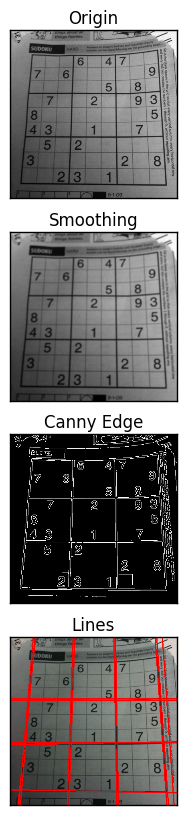

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Road image
img = cv2.imread('images/6/sudoku.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## Gaussian filter
filter_size = 5
filter_sigma = 1.3
gaussian_filter = np.dot(cv2.getGaussianKernel(filter_size, filter_sigma, cv2.CV_64F),
                        (cv2.getGaussianKernel(filter_size, filter_sigma, cv2.CV_64F)).T)

img_filtered = cv2.filter2D(gray, -1, gaussian_filter, 
                            borderType=cv2.BORDER_REFLECT_101) # reflect across edge filter

edges = cv2.Canny(img_filtered, 50,150)

lines = cv2.HoughLines(edges, 1.3, np.pi/180, 200)
print(lines.shape)

for rho, theta in zip(lines[:, :, 0], lines[:, :, 1]):
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)
    
fig, axis = plt.subplots(4, 1, figsize=(10, 10))
axis[0].imshow(gray, cmap="gray")
axis[0].set_title('Origin')
axis[0].set_xticks([])
axis[0].set_yticks([])

axis[1].imshow(img_filtered, cmap="gray")
axis[1].set_title('Smoothing')
axis[1].set_xticks([])
axis[1].set_yticks([])

axis[2].imshow(edges, cmap="gray")
axis[2].set_title('Canny Edge')
axis[2].set_xticks([])
axis[2].set_yticks([])

axis[3].imshow(img)
axis[3].set_title('Lines')
axis[3].set_xticks([])
axis[3].set_yticks([])

# 3. Fitting Circle using Hough algorithm

Finding a line is the easiest one for parametric model, but circle is more difficult than it!

<img src="images/6/Finding_Penny1.png" width="600px">
<img src="images/6/Finding_Penny2.png" width="600px">

## (1) Way of how circle fitting Hough algorithm works
This is only for the situation when we know a radius of the circle.

<img src="images/6/circle_equation1.png" width="600px">

If a radius is unknown, there will be three parameters.

<img src="images/6/circle_equation2.png" width="600px">

However, this is not going to work well in a great big 3D space.
Using the gradient direction can get rid of votes. So, in the Hough space, even though it's a three dimensional Hough space, voting is implemented along one line. This make voiting easier.

<img src="images/6/circle_equation3.png" width="600px">

## (2) Algorithm for circle

<img src="images/6/circle_algorithm.png" width="600px">

## (3) Pros and Cons of Hough transform

#### 1) pros
- All the points are processed independently, so can cope with occlusion.
- Some robustness to noise: noise points unlikely to contribute consistently to any single bin.
- Can detect multiple instances of a model in a single pass.

#### 2) Cons
- Complexity of search time increases exponentially with the number of model parameters.
- No-target shapes can produce spurious peaks in parameter space.
- Quantization: hard to pick a good grid size. 

# 3. Generalised Houh Transform

How do we know how to vote for an arbitrary shape? The way is to build what's called a Hough table.

## (1) Basic explanation of the Algorithm
- Training: build a Hough table
    1. At each boundary point, compute displacement vector: $\mathbf{r=c-p_i}$.
    2. Measure the gradient angle $\theta$ at the boundary point.
    3. Store that displacement in a table indexed by $\theta$.
<img src="images/6/Hough_table.png" width="300px">

- Recognition:
    1. At each boundary point, measure the gradient angle $\theta$
    2. Look up all displacements in $\theta$ displacement table.
    3. Vote for a centre at each displacement.
<img src="images/6/Hough_table.png" width="300px">

## (2) Generalised Hough transform example
Assumption:
1. We've got these little edge elements and these gradients
2. We know which way is inside to the edge and which way is outside.
<img src="images/6/Centre1.png" width="300px">

Firstrly, looking at the bottom gorizontal boundary points (all the same $\theta$), the set of displacements ranges over all the red vectors.

<img src="images/6/Centre2.png" width="300px">

All of those red lines, those are all the displacements associated with being a bottom horizontal edge. So, if I found a little bottom horizontal edge, I'd have to vote with all of those displacements.

Secondly, at recognition, each bottom horizontal element votes for all those displacements. 

<img src="images/6/Centre3.png" width="300px">

Here, there is a little edge element. And it's voting for all these different displacements, which all would lie along dotted line. 

It has to vote the same way, it comes from the same $\theta$.
<img src="images/6/Centre4.png" width="300px">

And eventually, this big long line of possible offsets are voted for. The one in the middle is actually voted for more often, so the middle may be thcker than the ends. But it is that, this line has the votes for, for where the centre might be. We don't know where along the centre it is yet. 
<img src="images/6/Centre5.png" width="300px">

Now, do for the leftward pointing diagonals. 
<img src="images/6/Centre6.png" width="300px">

At run time,
<img src="images/6/Centre7.png" width="300px">

Finally they've all stacke up.
<img src="images/6/Centre8.png" width="300px">

And the center is found.

So, the idea is that we're using this table of those offsets, indexed by the gradient, in order to vote for the centre.

## (3) Algorithm

#### If orientation is known:
<img src="images/6/Generalised1.png" width="500px">

#### If orientation is unknown:
<img src="images/6/Generalised2.png" width="500px">

#### If scale and orientation are unknown:
<img src="images/6/Generalised3.png" width="500px">

## (4) Application in recognition

There is the modern approach to using these Hough transform, displacement vectors.

Instead of using edges or the idea of high value gradients as a feature that we can find, little __feature patches__ are going to be used. 

Feature patches are just little chunks of an image that, for some reason, these are useful things to try to go find. 

- Instead of indexing displacements by gradient orientation, index by __visual codeword__.

There is a traning image here, and we're going to assume for now that our feature patch is tire. 

In the image, there are tires in two different places, and so in the same way as with the gradient, there are displacement vectors to the right and left from the tires, and they are put in a table that's indexed by the feature patch. In fact, it's indexed by the same feature type.
<img src="images/6/Recognition1.png" width="500px">

So, these features are referred to as visual codewords, and the idea that we would have a table based upon the codewords, and associated with each codeword is the set of displacement vectors that we have to vote with every time we find that feature anywhere in the image. 

#### 1) Training

So, the first step in training are developing what's called visual code-words. 

1. __Build codebook of patches around extracted interest points using clustering.__
(__Interest points:__ these are points in the image where reasonable amounts of interesting stuff is happening.)

    In this step, we take the interest operator, and pull out all the interesting points on a bunch of training images. Then, we collect the little image patch right around those points (it may get hundreds of them or thousands of them), and then we cluster them. And when we're all done with those clusters, the centres of those clusters are referred to, as visual code words. 

    <img src="images/6/Recognition2.png" width="500px">

    So, these becomes the little features that we're going to look for in different images. 

2. __Map the patch around each _interest point_ to closest codebook entry__.
    
    The second thing we do is to take these code words, these are our features of tire in this case. We found everywhere that the tire landed in the image. 
    
    <img src="images/6/Recognition3.png" width="500px">
        
    Cross marks are interest points. For every interest points, we find the feature that seems to look best at that point. So that becomes the label of that point. 
    
    Note that we had a label befor that said the gradient was horizontal pointing inward, but here we have the label is that it's the bottom right-hand corner of a tire. So this si mapping each of the interest points to some particular patch. 
    
3. __For each codebook entry, store all displacements relative to object centre__.

    Finally, what we do is we take each of these little features and we treat them just like we treated those little gradient images. 
    
    <img src="images/6/Recognition4.png" width="500px">
    
    We take the patch, and we find the displacement vector to the centre, and we write down that displacement vector in a table that's indexed by a patch label. 
    
    So, if I find a tire and it's to the left, which means the displacement vector is to the right. If I find a tire to the right, which means its displacement vector is to the left. Then I add that same displacement vector to the table with the entry of the tire, and that stores all those displacements. 

## (4) Example

This example is to detects cars only using a tire patch.

<img src="images/6/Car1.png" width="500px">

Suppose, we look everywhere and we find these four tires. 

<img src="images/6/Car2.png" width="500px">

After we find that, we have to take the displacement vectors associated with that codeword and vote with all those displacement vectors. So we vote for those.

<img src="images/6/Car3.png" width="500px">

And then, we simply look for spots; points that have more votes than other places. And in this case, it's just in the center of the cars. 

<img src="images/6/Car4.png" width="500px">